# **Find the Best Location to Open an Ice Cream Shop in Boston Area**
Capstone Project
***

# Introduction
Selecting a location for a business is one of the most critical decisions in running a business. Business decision-makers need to consider different factors in finding the right location for the business, such as financial factors, market factors, and the factors that will affect their demand and revenue. This project can help those who plan to open a new business such as an ice-cream shop and need to find the best location for the shop in a city.

# Business Problem
Finding the best location to start a new business in a large city such as Boston is challenging. Boston has 23 neighborhoods with various places that attract tourists and people to visit. Neighborhoods of Boston are different in terms of factors that can directly or indirectly affect business success. For an informed decision, it is essential to evaluate all neighborhoods based on the factors that affect running a successful business, such as the number of competitors and the potential demand in each neighborhood. Budget limitations in renting or buying a place also play an essential role in this decision-making, especially for small businesses.  

In this project, We want to help a client find the best neighborhood in Boston to open an Ice Cream shop. Finding a neighborhood that is close enough to some amenities and venues, has fewer competitors, and is affordable is challenging for our client. An ice cream shop is good near a place where many people visit, such as near a cinema, park, garden, playground, etc. Also, the client has a limited budget, and a neighborhood with fewer competitors is less risky for him/her to start the business. 

# Data
## Use BeautifulSoup to extract the neighborhoods:
We need to extract the 23 neighborhoods of Boston and the median one-bedroom rent price (as an estimate of the renting cost of the shop) of each neighborhood. For this purpose, We will use the following website and apply the BeautifulSoup website scraping library to extract the data.
 http://realestate.boston.com/renting/2019/02/19/median-one-bedroom-rent-price/


In [1]:
import numpy as np
import pandas as pd

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "http://realestate.boston.com/renting/2019/02/19/median-one-bedroom-rent-price/"
html = urlopen(url)

# create a Beautiful Soup object from the html
soup = BeautifulSoup(html, 'lxml')
type(soup)

# using right click and inspect on the webpage we found the class of the useful part of the page:
website_text = soup.find('div', {'class' :'content-text'}).text

#convert the string to list
import re
My_list= re.findall('(.+?)\n' , website_text)
My_list


['It’s tough to find an affordable apartment in Boston, so it’s important to keep on top of the latest rental prices to ensure you are getting the most for your money.',
 'We turned to the national rental website Zumper for the median rent for a one-bedroom apartment in each Boston neighborhood,\xa0based on the website’s own listings and the Multiple Listing Service.',
 'Here are the median monthly rents for a one-bedroom in Boston since last fall.',
 'Allston',
 'Winter 2019: $1,950',
 'Fall 2018:\xa0$2,150',
 'Back Bay',
 'Winter 2019: $2,900',
 'Fall 2018:\xa0$2,800',
 'Bay Village',
 'Winter 2019: $2,700',
 'Fall 2018:\xa0$2,700',
 'Beacon Hill',
 'Winter 2019: $2,400',
 'Fall 2018:\xa0$2,450',
 'Brighton',
 'Winter 2019: $1,850',
 'Fall 2018:\xa0$1,800',
 'Charlestown',
 'Winter 2019: $2,600',
 'Fall 2018:\xa0$2,500',
 'Chinatown',
 'Winter 2019: $3,000',
 'Fall 2018:\xa0$2,910',
 'Dorchester',
 'Winter 2019: $1,875',
 'Fall 2018:\xa0$1,800',
 'Downtown',
 'Winter 2019: $3,050',
 

Transform the data into pandas dataframe:

In [3]:
#remove the first 3 unuseful elements of the list
del My_list[0:3]

#create a list of all the neighborhoods:
My_nb= My_list[0::3]

#add ', MA, USA' to the name of the neighborhoods to make sure geopy we will find correct locations
nb=[s + ', MA, USA' for s in My_nb]

#create a list of average rent of the neighborhoods
rt=My_list[1::3]

#to remove the string 'Winter 2019: $' next to the rent values
My_list2=[s.replace('Winter 2019: $', '') for s in rt]

#create a panda dataframe of neighborhoods and their average rent of one-be apartment 
df_boston = pd.DataFrame({'Neighborhood':nb,'Average Rent':My_list2})

#to make sure we will find the right location of the neighborhoods in boston area
df_boston.xs(8)['Neighborhood']= 'Boston Downtown, MA,USA'
df_boston.xs(21)['Neighborhood']= 'South End Boston, MA,USA'

#remove 'Leather District' as geopy cannot fint its location
df_boston.drop([13], inplace=True)
df_boston

,Neighborhood,Average Rent
0,"Allston, MA, USA","1,950"
1,"Back Bay, MA, USA","2,900"
2,"Bay Village, MA, USA","2,700"
3,"Beacon Hill, MA, USA","2,400"
4,"Brighton, MA, USA","1,850"
5,"Charlestown, MA, USA","2,600"
6,"Chinatown, MA, USA","3,000"
7,"Dorchester, MA, USA","1,875"
8,"Boston Downtown, MA,USA","3,050"
9,"East Boston, MA, USA","1,800"


In [4]:
print('We are investigating {} neighborhoods of Boston.'.format (len(df_boston)))

We are investigating 23 neighborhoods of Boston.


## Use GeopPy to get the coordinates of the neighborhoods:
Use the GeoPy Python package to get the latitude and the longitude coordinates of all the neighborhoods of Boston:

In [5]:
#!conda install -c conda-forge geopy --yes 

In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
latlon = df_boston.Neighborhood.apply(lambda addr: geolocator.geocode(addr))
df_boston["Latitude"] = [x.latitude for x in latlon]
df_boston["Longitude"] = [x.longitude for x in latlon]

df_boston.to_csv('df-boston.csv')#save the dataframe
df_boston

,Neighborhood,Average Rent,Latitude,Longitude
0,"Allston, MA, USA","1,950",42.355434,-71.132127
1,"Back Bay, MA, USA","2,900",42.350707,-71.079730
2,"Bay Village, MA, USA","2,700",42.350011,-71.066948
3,"Beacon Hill, MA, USA","2,400",42.359820,-71.066162
4,"Brighton, MA, USA","1,850",42.350097,-71.156442
5,"Charlestown, MA, USA","2,600",42.377875,-71.061996
6,"Chinatown, MA, USA","3,000",42.352217,-71.062607
7,"Dorchester, MA, USA","1,875",42.297320,-71.074495
8,"Boston Downtown, MA,USA","3,050",42.349327,-71.078655
9,"East Boston, MA, USA","1,800",42.375097,-71.039217


## Map the neighborhoods:

In [7]:
#get location of Boston to map the neighborhoods
address = 'BOSTON, MA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Boston are 42.3602534, -71.0582912.


In [8]:
#!conda install -c conda-forge folium=0.5.0 --yes 

In [9]:
# create map of Boston using latitude and longitude values of the neighborhoods
import folium 
map_Boston = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_boston['Latitude'], df_boston['Longitude'], df_boston['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boston)  
            
map_Boston

## Use Foursquare API to get information about some venues around these neighborhoods:

Looking for Movie Theater, Playground, Park, Garden, Water Park, General Entertainment, Stadium, Amphitheater, Aquarium, Street Art, Beach, Recreation Center, and Pedestrian Plaza venues in walking distance (500 meters) from each of these neighborhood. These venues are places that many people usually visit them for entertainment and hence we will have good demand for ice cream around them. 

In [28]:
# Venue categories to search around each neighborhood
# The list of all venue categories of FourSquare can be found in the following link: https://developer.foursquare.com/docs/resources/categories. 

fs_categories = {
    
    'Movie Theater': '4bf58dd8d48988d17f941735',
    'Playground': '4bf58dd8d48988d1e7941735',
    'Park': '4bf58dd8d48988d163941735',
    'Garden': '4bf58dd8d48988d15a941735',
    'Water Park': '4bf58dd8d48988d193941735',
    'General Entertainment': '4bf58dd8d48988d1f1931735',
    'Stadium' : '4bf58dd8d48988d184941735',
    'Amphitheater' :'56aa371be4b08b9a8d5734db',
    'Aquarium' : '4fceea171983d5d06c3e9823',
    'Street Art' : '52e81612bcbc57f1066b79ee',
    'Beach' : '4bf58dd8d48988d1e2941735',
    'Recreation Center' : '52e81612bcbc57f1066b7a26',
    'Pedestrian Plaza': '52e81612bcbc57f1066b7a25'
}

', ' .join([ cat for cat in fs_categories])

'Movie Theater, Playground, Park, Garden, Water Park, General Entertainment, Stadium, Amphitheater, Aquarium, Street Art, Beach, Recreation Center, Pedestrian Plaza'

In [29]:
# Install FourSquare client library
!pip install foursquare

In [30]:
import foursquare
CLIENT_ID = '1HABFONPEEOMT0AS2GVXPK53A4EO43AXRTJVN3B03CG3N3BE'
CLIENT_SECRET = '0CR2ZL5CZHLX5OSIIJRZCBPXGCC1TIS2HQ04CUYLFBFRBG1Q' 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
fs = foursquare.Foursquare( CLIENT_ID, CLIENT_SECRET)
RADIUS = 500 

In [31]:
# Define a function to search nearby venues for the categories specified and convert the result as dataframe
def venues_nearby(latitude, longitude, category, verbose=True):    
    results = fs.venues.search(
        params = {
            'query': category, 
            'll': '{},{}'.format(latitude, longitude),
            'radius': RADIUS,
            'categoryId': fs_categories[category]
        }
    )    
    df = json_normalize(results['venues'])
    cols = ['Name','Latitude','Longitude']    
    if( len(df) == 0 ):        
        df = pd.DataFrame(columns=cols)
    else:        
        df = df[['name','location.lat','location.lng']]
        df.columns = cols
    if( verbose ):
        print('{} "{}" venues are found within {}m of location'.format(len(df), category, RADIUS))
    return df

In [32]:
# to check the spesified venue categories for all the neighborhoods
from pathlib import Path

venues_csv = Path('./boston_venues.csv')
df_venues = None

# check the venues data is explored and downloaded 
if( venues_csv.exists() ):
    df_venues = pd.read_csv('./boston_venues.csv')
else:    
    # construct a dataframe to store data
    df_venues = pd.DataFrame(columns=[ 'Category','Latitude', 'Longitude'])
    for (name, average_rent, latitude, longitude) in df_boston.itertuples(index=False):
        for cat, cat_id in fs_categories.items():
            df = venues_nearby(latitude, longitude, cat, verbose=False)
            df['Neighborhood'] = name
            df['Average Rent'] = average_rent
            df['Category'] = cat
            df_venues = df_venues.append(df, sort=True)
    df_venues.to_csv('boston_venues.csv', index=False)

In [33]:
print('In total, {} venues are found in Boston.'.format(len(df_venues)))

df_venues.head()

In total, 214 venues are found in Boston.


,Average Rent,Category,Latitude,Longitude,Name,Neighborhood
0,"1,950",Playground,42.360342,-71.133651,Thomas Gardner Elementry School Playground,"Allston, MA, USA"
1,"2,900",Playground,42.352769,-71.076530,Clarendon Street Play Lot,"Back Bay, MA, USA"
2,"2,900",Park,42.346077,-71.078372,SW Corridor Park - Back Bay,"Back Bay, MA, USA"
3,"2,900",Park,42.352001,-71.077808,Firefighters Memorial Park,"Back Bay, MA, USA"
4,"2,900",Park,42.346132,-71.074815,Childe Hassam Park,"Back Bay, MA, USA"


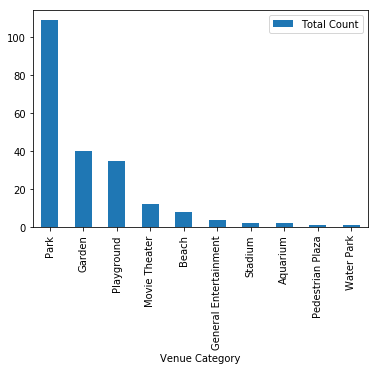

In [34]:
#number of venues from each category
import matplotlib.pyplot as plt
p= df_venues['Category'].value_counts().to_frame(name='Total Count')
p.index.name = 'Venue Category'
p.plot.bar(y='Total Count')

In [35]:
# number of venues for each neighborhood
df_groupby= df_venues.groupby('Neighborhood').count().reset_index()
df_groupby

,Neighborhood,Average Rent,Category,Latitude,Longitude,Name
0,"Allston, MA, USA",1,1,1,1,1
1,"Back Bay, MA, USA",6,6,6,6,6
2,"Bay Village, MA, USA",21,21,21,21,21
3,"Beacon Hill, MA, USA",14,14,14,14,14
4,"Boston Downtown, MA,USA",8,8,8,8,8
5,"Brighton, MA, USA",3,3,3,3,3
6,"Charlestown, MA, USA",7,7,7,7,7
7,"Chinatown, MA, USA",21,21,21,21,21
8,"Dorchester, MA, USA",2,2,2,2,2
9,"East Boston, MA, USA",4,4,4,4,4


In [36]:
#the dataset of all the venues from different categories in each neighborhood
boston_onehot = pd.get_dummies(df_venues[['Category']], prefix="", prefix_sep="")#one hot encoding
boston_onehot['Neighborhood'] = df_venues['Neighborhood'] 
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]
boston_onehot.head()

,Neighborhood,Aquarium,Beach,Garden,General Entertainment,Movie Theater,Park,Pedestrian Plaza,Playground,Stadium,Water Park
0,"Allston, MA, USA",0,0,0,0,0,0,0,1,0,0
1,"Back Bay, MA, USA",0,0,0,0,0,0,0,1,0,0
2,"Back Bay, MA, USA",0,0,0,0,0,1,0,0,0,0
3,"Back Bay, MA, USA",0,0,0,0,0,1,0,0,0,0
4,"Back Bay, MA, USA",0,0,0,0,0,1,0,0,0,0


## Group rows by neighborhood to compare the frequency of different venue categories in each neighborhood: 

In [37]:
boston_grouped = boston_onehot.groupby('Neighborhood').sum().reset_index()
boston_grouped

,Neighborhood,Aquarium,Beach,Garden,General Entertainment,Movie Theater,Park,Pedestrian Plaza,Playground,Stadium,Water Park
0,"Allston, MA, USA",0,0,0,0,0,0,0,1,0,0
1,"Back Bay, MA, USA",0,0,1,1,0,3,0,1,0,0
2,"Bay Village, MA, USA",1,1,2,0,4,12,0,1,0,0
3,"Beacon Hill, MA, USA",0,1,5,0,0,4,0,3,0,1
4,"Boston Downtown, MA,USA",0,1,1,1,0,4,0,1,0,0
5,"Brighton, MA, USA",0,1,0,0,0,2,0,0,0,0
6,"Charlestown, MA, USA",0,0,2,0,0,2,0,3,0,0
7,"Chinatown, MA, USA",1,0,2,0,4,11,1,2,0,0
8,"Dorchester, MA, USA",0,0,1,0,0,1,0,0,0,0
9,"East Boston, MA, USA",0,0,0,0,0,4,0,0,0,0


In [38]:
#neighborhoods without any 'Movie Theater, Playground, Park, Garden, Zoo, Water Park, General Entertainment, Stadium'venues: 
print('We will remove {} from the investigation as does not have any Movie Theater, Playground, Park, Garden, Water Park, General Entertainment, Stadium, Amphitheater, Aquarium, Street Art, Beach, Recreation Center, Pedestrian Plaza venues around.'
      .format(set(df_boston['Neighborhood']).difference(boston_grouped['Neighborhood'])))

We will remove {'Jamaica Plain, MA, USA'} from the investigation as does not have any Movie Theater, Playground, Park, Garden, Water Park, General Entertainment, Stadium, Amphitheater, Aquarium, Street Art, Beach, Recreation Center, Pedestrian Plaza venues around.


In [39]:
### sort venues for each neighborhood
for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(int)
    temp = temp.round({'freq': 0})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True))
    print('\n')

----Allston, MA, USA----
                   venue  freq
0             Playground     1
1               Aquarium     0
2                  Beach     0
3                 Garden     0
4  General Entertainment     0
5          Movie Theater     0
6                   Park     0
7       Pedestrian Plaza     0
8                Stadium     0
9             Water Park     0


----Back Bay, MA, USA----
                   venue  freq
0                   Park     3
1                 Garden     1
2  General Entertainment     1
3             Playground     1
4               Aquarium     0
5                  Beach     0
6          Movie Theater     0
7       Pedestrian Plaza     0
8                Stadium     0
9             Water Park     0


----Bay Village, MA, USA----
                   venue  freq
0                   Park    12
1          Movie Theater     4
2                 Garden     2
3               Aquarium     1
4                  Beach     1
5             Playground     1
6  General Entert

In [40]:
#a function to sort the venues in decrising order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
#find top 5 most common venues around each neighborhood
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

columns =[ 'Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)

neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']


for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

#neighborhoods_venues_sorted['Average Rent'] = df_boston_nj['Average Rent']
neighborhoods_venues_sorted['# of venues']= df_groupby['Category']

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues
0,"Allston, MA, USA",Playground,Water Park,Stadium,Pedestrian Plaza,Park,1
1,"Back Bay, MA, USA",Park,Playground,General Entertainment,Garden,Water Park,6
2,"Bay Village, MA, USA",Park,Movie Theater,Garden,Playground,Beach,21
3,"Beacon Hill, MA, USA",Garden,Park,Playground,Water Park,Beach,14
4,"Boston Downtown, MA,USA",Park,Playground,General Entertainment,Garden,Beach,8
5,"Brighton, MA, USA",Park,Beach,Water Park,Stadium,Playground,3
6,"Charlestown, MA, USA",Playground,Park,Garden,Water Park,Stadium,7
7,"Chinatown, MA, USA",Park,Movie Theater,Playground,Garden,Pedestrian Plaza,21
8,"Dorchester, MA, USA",Park,Garden,Water Park,Stadium,Playground,2
9,"East Boston, MA, USA",Park,Water Park,Stadium,Playground,Pedestrian Plaza,4


## Looking for Ice cream shops within walking distance (500 meters) of each of the neighborhoods to get an understanding of the competitors in each neighborhood:

In [42]:
# Ice cream shop category in FourSquare
fs_categories = {
    'Ice Cream Shop': ' 4bf58dd8d48988d1c9941735',
}

In [43]:
# check Ice cream shop venue for all the neighborhoods
from pathlib import Path

venues_csv = Path('./boston_ic_cream.csv')
df_venues = None
if( venues_csv.exists() ):
    df_venues = pd.read_csv('./boston_ic_creams.csv')
else:    
    # construct a dataframe to store data
    df_venues = pd.DataFrame(columns=[ 'Category','Latitude', 'Longitude'])
    for (name, average_rent, latitude, longitude) in df_boston.itertuples(index=False):
        for cat, cat_id in fs_categories.items():
            df = venues_nearby(latitude, longitude, cat, verbose=False)
            df['Neighborhood'] = name
            df['Average Rent'] = average_rent
            df['Category'] = cat
            df_venues = df_venues.append(df, sort=True)
    df_venues.to_csv('boston__ic_cream.csv', index=False)
   
print('Total {} Ice Cream Shop are found in Boston Area.'.format(len(df_venues)))

Total 23 Ice Cream Shop are found in Boston Area.


In [44]:
#number of Ice cream shops within walking distance of each of the neighborhoods
boston_onehot_ic = pd.get_dummies(df_venues[['Category']], prefix="", prefix_sep="")#one hot encoding
boston_onehot_ic['Neighborhood'] = df_venues['Neighborhood'] # add neighborhood column back to dataframe
fixed_columns = [boston_onehot_ic.columns[-1]] + list(boston_onehot_ic.columns[:-1])
boston_onehot_ic = boston_onehot_ic[fixed_columns]
boston_grouped_ic = boston_onehot_ic.groupby('Neighborhood').sum().reset_index()
boston_icecreamshops = pd.merge(df_boston, boston_grouped_ic, on=['Neighborhood'], how='outer').fillna(0)
boston_icecreamshops 

,Neighborhood,Average Rent,Latitude,Longitude,Ice Cream Shop
0,"Allston, MA, USA","1,950",42.355434,-71.132127,2.0
1,"Back Bay, MA, USA","2,900",42.350707,-71.079730,2.0
2,"Bay Village, MA, USA","2,700",42.350011,-71.066948,0.0
3,"Beacon Hill, MA, USA","2,400",42.359820,-71.066162,3.0
4,"Brighton, MA, USA","1,850",42.350097,-71.156442,0.0
5,"Charlestown, MA, USA","2,600",42.377875,-71.061996,1.0
6,"Chinatown, MA, USA","3,000",42.352217,-71.062607,1.0
7,"Dorchester, MA, USA","1,875",42.297320,-71.074495,0.0
8,"Boston Downtown, MA,USA","3,050",42.349327,-71.078655,2.0
9,"East Boston, MA, USA","1,800",42.375097,-71.039217,0.0


In [45]:
#add the number of ice cream shops to the dataframe of all the neighborhoods with the list of 5 most common venues
df_neighborhoods = pd.merge(neighborhoods_venues_sorted, boston_icecreamshops, on=['Neighborhood'], how='inner')
df_neighborhoods

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Average Rent,Latitude,Longitude,Ice Cream Shop
0,"Allston, MA, USA",Playground,Water Park,Stadium,Pedestrian Plaza,Park,1,"1,950",42.355434,-71.132127,2.0
1,"Back Bay, MA, USA",Park,Playground,General Entertainment,Garden,Water Park,6,"2,900",42.350707,-71.079730,2.0
2,"Bay Village, MA, USA",Park,Movie Theater,Garden,Playground,Beach,21,"2,700",42.350011,-71.066948,0.0
3,"Beacon Hill, MA, USA",Garden,Park,Playground,Water Park,Beach,14,"2,400",42.359820,-71.066162,3.0
4,"Boston Downtown, MA,USA",Park,Playground,General Entertainment,Garden,Beach,8,"3,050",42.349327,-71.078655,2.0
5,"Brighton, MA, USA",Park,Beach,Water Park,Stadium,Playground,3,"1,850",42.350097,-71.156442,0.0
6,"Charlestown, MA, USA",Playground,Park,Garden,Water Park,Stadium,7,"2,600",42.377875,-71.061996,1.0
7,"Chinatown, MA, USA",Park,Movie Theater,Playground,Garden,Pedestrian Plaza,21,"3,000",42.352217,-71.062607,1.0
8,"Dorchester, MA, USA",Park,Garden,Water Park,Stadium,Playground,2,"1,875",42.297320,-71.074495,0.0
9,"East Boston, MA, USA",Park,Water Park,Stadium,Playground,Pedestrian Plaza,4,"1,800",42.375097,-71.039217,0.0


# Methodology

To start a new business, we need to select neighborhoods with fewer competitors. For this purpose, we will remove the neighborhoods with more than one ice cream shops. We will use K-means clustering to classify the neighborhoods based on the nearby venues and their frequencies (except the ice cream shop category). To make the decision, we will sort the neighborhoods in each cluster based on their average rent price. A neighborhood with more number of venues, no ice cream shop, and a lower price will be the best option.

## Select neighborhoods with fewer competitors
We remove neighborhoods with more than one ice cream shop:

In [46]:
low_competitor=df_neighborhoods[df_neighborhoods['Ice Cream Shop'] < 2]
low_competitor

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Average Rent,Latitude,Longitude,Ice Cream Shop
2,"Bay Village, MA, USA",Park,Movie Theater,Garden,Playground,Beach,21,"2,700",42.350011,-71.066948,0.0
5,"Brighton, MA, USA",Park,Beach,Water Park,Stadium,Playground,3,"1,850",42.350097,-71.156442,0.0
6,"Charlestown, MA, USA",Playground,Park,Garden,Water Park,Stadium,7,"2,600",42.377875,-71.061996,1.0
7,"Chinatown, MA, USA",Park,Movie Theater,Playground,Garden,Pedestrian Plaza,21,"3,000",42.352217,-71.062607,1.0
8,"Dorchester, MA, USA",Park,Garden,Water Park,Stadium,Playground,2,"1,875",42.297320,-71.074495,0.0
9,"East Boston, MA, USA",Park,Water Park,Stadium,Playground,Pedestrian Plaza,4,"1,800",42.375097,-71.039217,0.0
11,"Hyde Park, MA, USA",Park,Movie Theater,Water Park,Stadium,Playground,2,"1,625",42.255654,-71.124496,1.0
12,"Longwood Medical Area, MA, USA",Park,Playground,Garden,Water Park,Stadium,14,"2,300",42.336168,-71.099527,1.0
13,"Mattapan, MA, USA",Park,Water Park,Stadium,Playground,Pedestrian Plaza,1,"1,500",42.272321,-71.086995,0.0
14,"Mission Hill, MA, USA",Park,Playground,Garden,Water Park,Stadium,10,"2,100",42.332926,-71.103214,1.0


## Cluster the neighborhoods: 
Run k-means to cluster the neighborhood into 5 clusters based on the frequency of different venue categories (except ice-cream shop) around them

In [47]:
# different categories for neighborhoods with less than 2 ice-cream shops
boston_grouped_reduced= boston_grouped[boston_grouped.index.isin(low_competitor.index)]
boston_grouped_reduced

,Neighborhood,Aquarium,Beach,Garden,General Entertainment,Movie Theater,Park,Pedestrian Plaza,Playground,Stadium,Water Park
2,"Bay Village, MA, USA",1,1,2,0,4,12,0,1,0,0
5,"Brighton, MA, USA",0,1,0,0,0,2,0,0,0,0
6,"Charlestown, MA, USA",0,0,2,0,0,2,0,3,0,0
7,"Chinatown, MA, USA",1,0,2,0,4,11,1,2,0,0
8,"Dorchester, MA, USA",0,0,1,0,0,1,0,0,0,0
9,"East Boston, MA, USA",0,0,0,0,0,4,0,0,0,0
11,"Hyde Park, MA, USA",0,0,0,0,1,1,0,0,0,0
12,"Longwood Medical Area, MA, USA",0,0,3,0,0,8,0,3,0,0
13,"Mattapan, MA, USA",0,0,0,0,0,1,0,0,0,0
14,"Mission Hill, MA, USA",0,0,1,0,0,6,0,3,0,0


In [48]:
from sklearn.cluster import KMeans
kclusters = 5 # set number of clusters

boston_grouped_clustering = boston_grouped_reduced.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# find cluster labels generated for each row of boston_grouped dataframe (neghborhoods of boston excep Jamaica Plain and Mattapan)
kmeans.labels_[0:15] 

array([2, 1, 1, 2, 1, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1], dtype=int32)

In [49]:
#to add the clusters to the dataframe
low_competitor.insert(0, 'Cluster Label', kmeans.labels_)# add clustering labels

In [50]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
boston_merged = pd.merge(df_boston, low_competitor, on=['Neighborhood', 'Average Rent','Latitude','Longitude'], how='inner')
boston_merged

,Neighborhood,Average Rent,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
0,"Bay Village, MA, USA","2,700",42.350011,-71.066948,2,Park,Movie Theater,Garden,Playground,Beach,21,0.0
1,"Brighton, MA, USA","1,850",42.350097,-71.156442,1,Park,Beach,Water Park,Stadium,Playground,3,0.0
2,"Charlestown, MA, USA","2,600",42.377875,-71.061996,1,Playground,Park,Garden,Water Park,Stadium,7,1.0
3,"Chinatown, MA, USA","3,000",42.352217,-71.062607,2,Park,Movie Theater,Playground,Garden,Pedestrian Plaza,21,1.0
4,"Dorchester, MA, USA","1,875",42.297320,-71.074495,1,Park,Garden,Water Park,Stadium,Playground,2,0.0
5,"East Boston, MA, USA","1,800",42.375097,-71.039217,4,Park,Water Park,Stadium,Playground,Pedestrian Plaza,4,0.0
6,"Hyde Park, MA, USA","1,625",42.255654,-71.124496,1,Park,Movie Theater,Water Park,Stadium,Playground,2,1.0
7,"Longwood Medical Area, MA, USA","2,300",42.336168,-71.099527,3,Park,Playground,Garden,Water Park,Stadium,14,1.0
8,"Mattapan, MA, USA","1,500",42.272321,-71.086995,1,Park,Water Park,Stadium,Playground,Pedestrian Plaza,1,0.0
9,"Mission Hill, MA, USA","2,100",42.332926,-71.103214,3,Park,Playground,Garden,Water Park,Stadium,10,1.0


In [51]:
#!conda install -c conda-forge folium=0.5.0 --yes 

## Map the clustered neighborhoods

In [52]:
#visualize the clustered neighborhoods of boston
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Matplotlib and associated plotting modules
import folium 
from folium.features import CustomIcon
from folium.plugins import MarkerCluster
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Neighborhood'], boston_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Results
The result of 5 clusters are specified in this section. The neighborhoods in each cluster are sorted based on their average rent price:

 **Cluster 1:**

In [50]:
cluster1= boston_merged.loc[boston_merged['Cluster Label'] == 0]
cols = [0,1,5,6,7,8,9,10,11]
cluster1[cluster1.columns[cols]]

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
13,"South End Boston, MA,USA","2,700",Park,Garden,Playground,Movie Theater,Water Park,24,0.0


 **Cluster 2:**

In [45]:
cluster2=boston_merged.loc[boston_merged['Cluster Label'] == 1]
cluster2[cluster2.columns[cols]].sort_values(['Average Rent'], ascending=True) #sort the neighborhoods in the cluster based on their average rent

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
8,"Mattapan, MA, USA","1,500",Park,Water Park,Stadium,Playground,Pedestrian Plaza,1,0.0
6,"Hyde Park, MA, USA","1,625",Park,Movie Theater,Water Park,Stadium,Playground,2,1.0
10,"Roslindale, MA, USA","1,700",Playground,Water Park,Stadium,Pedestrian Plaza,Park,2,0.0
14,"West Roxbury, MA, USA","1,810",Playground,Water Park,Stadium,Pedestrian Plaza,Park,1,0.0
1,"Brighton, MA, USA","1,850",Park,Beach,Water Park,Stadium,Playground,3,0.0
4,"Dorchester, MA, USA","1,875",Park,Garden,Water Park,Stadium,Playground,2,0.0
2,"Charlestown, MA, USA","2,600",Playground,Park,Garden,Water Park,Stadium,7,1.0


 **Cluster 3:**

In [46]:
cluster3=boston_merged.loc[boston_merged['Cluster Label'] == 2]
cluster3[cluster3.columns[cols]].sort_values(['Average Rent'], ascending=True) #sort the neighborhoods in the cluster based on their average rent

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
0,"Bay Village, MA, USA","2,700",Park,Movie Theater,Garden,Playground,Beach,21,0.0
3,"Chinatown, MA, USA","3,000",Park,Movie Theater,Playground,Garden,Pedestrian Plaza,21,1.0


**Cluster 4:**

In [47]:
cluster4=boston_merged.loc[boston_merged['Cluster Label'] == 3]
cluster4[cluster4.columns[cols]].sort_values(['Average Rent'], ascending=True)  #sort the neighborhoods in the cluster based on their average rent

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
9,"Mission Hill, MA, USA","2,100",Park,Playground,Garden,Water Park,Stadium,10,1.0
7,"Longwood Medical Area, MA, USA","2,300",Park,Playground,Garden,Water Park,Stadium,14,1.0


**Cluster 5:**

In [48]:
cluster5=boston_merged.loc[boston_merged['Cluster Label'] == 4]
cluster5[cluster5.columns[cols]].sort_values(['Average Rent'], ascending=True)  #sort the neighborhoods in the cluster based on their average rent

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
11,"Roxbury, MA, USA","1,780",Park,Playground,Garden,Water Park,Stadium,7,1.0
5,"East Boston, MA, USA","1,800",Park,Water Park,Stadium,Playground,Pedestrian Plaza,4,0.0
12,"South Boston, MA, USA","2,800",Park,Beach,Stadium,Water Park,Playground,6,0.0


# Discussion

According to the result of our analysis, South End Boston (in cluster 1) is the best neighborhood to open an ice cream shop in Boston. It has the most number of total venues and is expected to attract many people to visit. This neighborhood with 12 parks, 7 gardens, 4 playgrounds, and one movie theater and no ice cream shop within walking distance is the best option. However, the final decision is dependent on the budget of the client to rent the place. According to the budget limitations of the client, we can find other neighborhoods and select the one with the most number of venues and less number of ice cream shops around. This clustering can also help our client compare different neighborhoods to make a better decision. For example, South End Boston is a better option comparing to both neighborhoods in cluster 3 as has less average rent price, a larger number of venues, and no ice cream shop around. 


# Conclusion

We used the information about the neighborhoods of Boston to help my client to select the best location to open an ice cream shop in Boston. We considered number of competitors, demand for ice cream, and budget limitations to find the best location options. 

This project has some limitations. First, we have limited the location options to the neighborhoods of Boston, however considering more specific locations such as particular streets can improve the accuracy of our decision. Second, we used the median of one bedroom rent price in each neighborhood as an estimate of the rent price. Third, we limited our investigation for the venues within 500 meter of the neighborhoods and changing it can affect the clusters. Also, we considered equal weights for different venues and as an extension one can consider different weights for the venues (for example being near a beach has more impact on the demand for ice cream comparing to being near a pedestrian plaza).